In [ ]:
!pip install kaggle

In [ ]:
import os
from google.colab import files

# If you haven't uploaded kaggle.json yet, run this cell to upload it
if not os.path.exists("/root/.kaggle/kaggle.json"):
    os.makedirs("/root/.kaggle", exist_ok=True)
    uploaded = files.upload()
    for name, data in uploaded.items():
        with open("/root/.kaggle/kaggle.json", "wb") as f:
            f.write(data)
    os.chmod("/root/.kaggle/kaggle.json", 600)

Saving kaggle.json to kaggle.json


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/netflix-shows


In [ ]:
import pandas as pd
import os

# The path variable from the previous cell contains the directory where the dataset was downloaded
dataset_path = path

# Assuming the dataset is in a CSV file within the downloaded directory,
# we need to find the CSV file.
# You might need to adjust the filename if it's different.
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

if csv_files:
    # Assuming the first CSV file is the one you want to load
    dataset_file = os.path.join(dataset_path, csv_files[0])

    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(dataset_file)

    # Display the column headers
    print("Column Headers:")
    print(df.columns.tolist())

    # Print the first few rows of the DataFrame
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

else:
    print("No CSV files found in the dataset directory.")

Column Headers:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

First 5 rows of the dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           dat

In [ ]:
# Handle missing values
df.dropna(subset=['date_added', 'rating'], inplace=True) # Drop rows with missing date_added or rating

# For other columns with missing values, you might consider different strategies:
# - For 'director' and 'cast', you could replace NaN with 'Unknown' or an empty string
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
# - For 'country', you could replace NaN with 'Unknown' or the most frequent country
df['country'].fillna(df['country'].mode()[0], inplace=True)


# Drop duplicates
df.drop_duplicates(inplace=True)

# Parse date_added into datetime, coercing errors
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows where date_added could not be parsed
df.dropna(subset=['date_added'], inplace=True)


# Fix inconsistent formats (example: duration - remove 'min' and 'Seasons' and convert to integer)
# This requires more specific knowledge of the inconsistencies. Here's an example for 'duration':
def clean_duration(duration):
    if isinstance(duration, str):
        if 'min' in duration:
            return int(duration.replace(' min', ''))
        elif 'Season' in duration:
            return int(duration.replace(' Season', '').replace('s', '')) # Handle both 'Season' and 'Seasons'
    return None # Handle cases that don't match expected formats

# Apply the cleaning function to the 'duration' column
df['duration_cleaned'] = df['duration'].apply(clean_duration)

# For 'ratings' and 'genres' (listed_in), inconsistent formats might require
# more complex mapping or parsing based on the specific variations.
# This is a placeholder and would need to be adapted to the actual data issues.
# Example: Standardizing rating names or separating genres into multiple columns.


# Display the cleaned data information
print("DataFrame after cleaning:")
df.info()
print("\nFirst 5 rows after cleaning:")
print(df.head())

DataFrame after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 8705 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8705 non-null   object        
 1   type              8705 non-null   object        
 2   title             8705 non-null   object        
 3   director          8705 non-null   object        
 4   cast              8705 non-null   object        
 5   country           8705 non-null   object        
 6   date_added        8705 non-null   datetime64[ns]
 7   release_year      8705 non-null   int64         
 8   rating            8705 non-null   object        
 9   duration          8702 non-null   object        
 10  listed_in         8705 non-null   object        
 11  description       8705 non-null   object        
 12  duration_cleaned  8702 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
me

/tmp/ipython-input-11-162224669.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-11-162224669.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

# Task
Analyze the Netflix dataset "netflix_titles.csv" by performing the following steps:
1. Load and clean the data: handle missing values in 'director', 'cast', and 'country', drop duplicates, parse 'date_added' into datetime, and fix inconsistent formats in 'rating' and 'listed_in'.
2. Perform univariate analysis:
    - Determine and visualize the most common content types ('Movie' vs 'TV Show').
    - Determine and visualize the most frequent ratings.
    - Determine and visualize the most prolific release years.
    - Clean the genre strings in 'listed_in' and determine and visualize the top genres.

## Analyze content types

### Subtask:
Calculate and visualize the distribution of 'Movie' vs 'TV Show'.


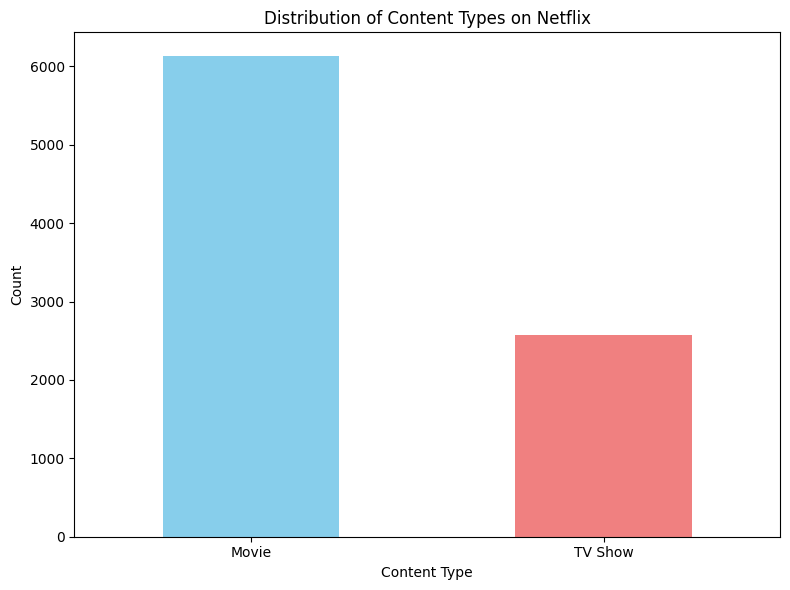

In [ ]:
import matplotlib.pyplot as plt

# Calculate the distribution of 'type'
content_distribution = df['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
content_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Analyze ratings

### Subtask:
Calculate and visualize the frequency of different content ratings.


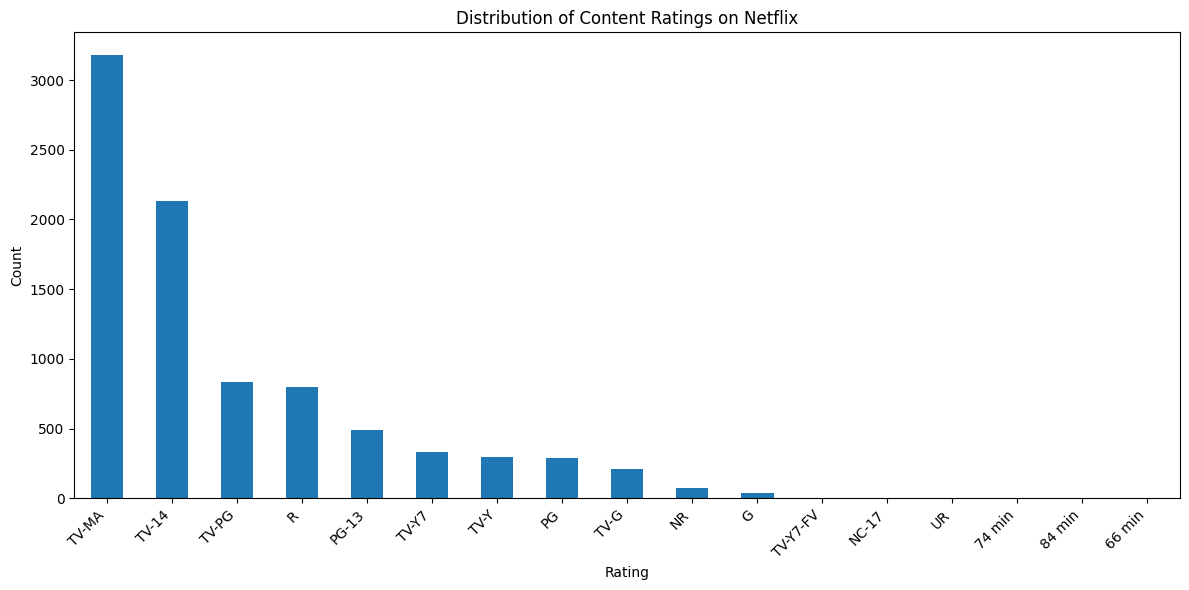

In [ ]:
# Calculate the frequency of each unique value in the 'rating' column
rating_counts = df['rating'].value_counts()

# Create a bar plot to visualize the frequency of each rating
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Analyze release years

### Subtask:
Find and visualize the most prolific release years.


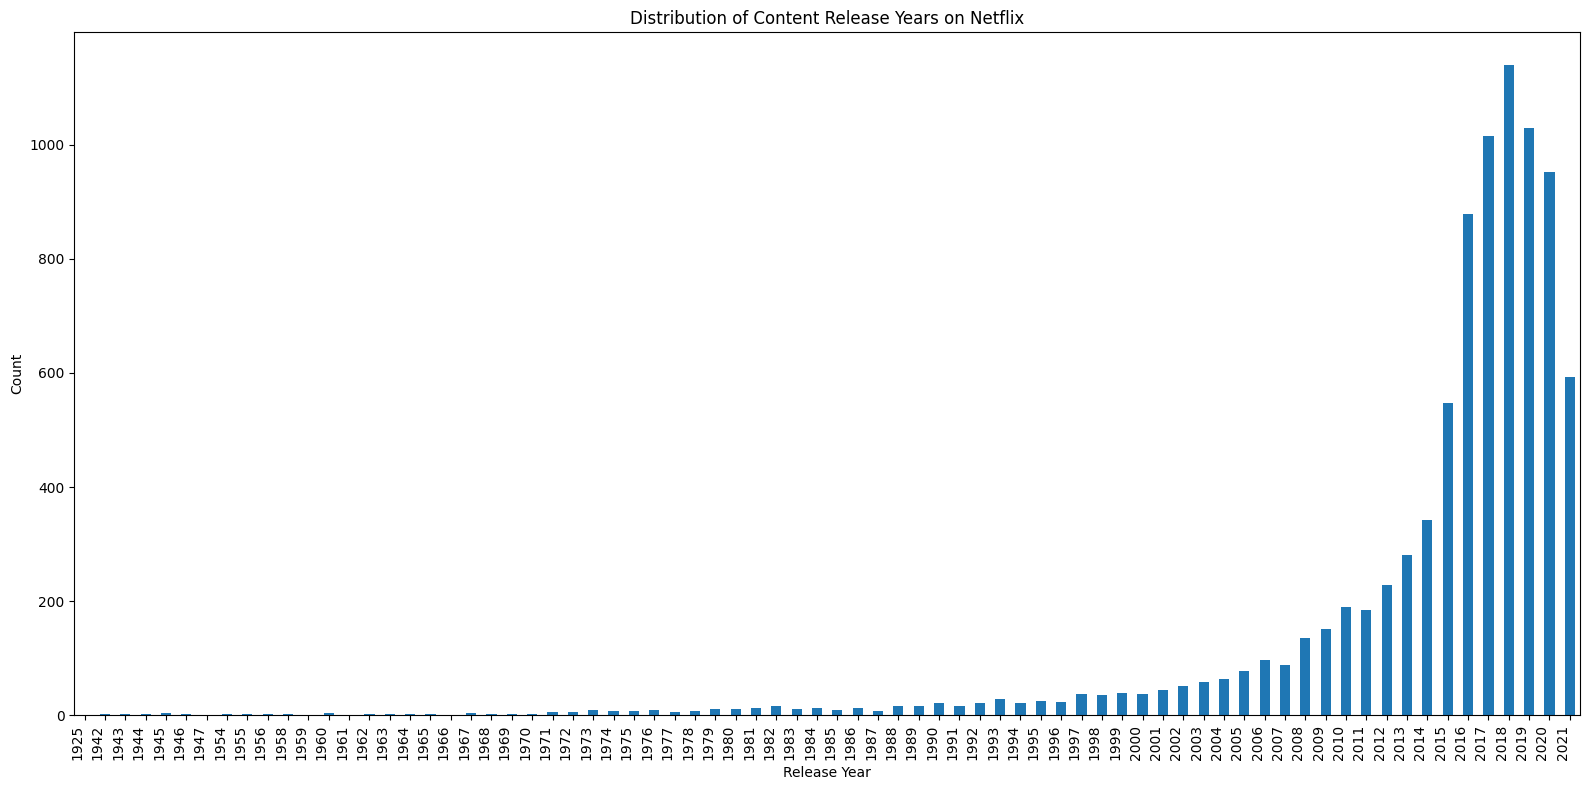

In [ ]:
# Calculate the value counts for the 'release_year' column
release_year_counts = df['release_year'].value_counts().sort_index()

# Create a bar plot to visualize the frequency of each release year
plt.figure(figsize=(16, 8)) # Increased figure size for better visibility
release_year_counts.plot(kind='bar')
plt.title('Distribution of Content Release Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Clean and analyze genres

### Subtask:
Clean the genre strings in the 'listed_in' column and analyze the top genres.


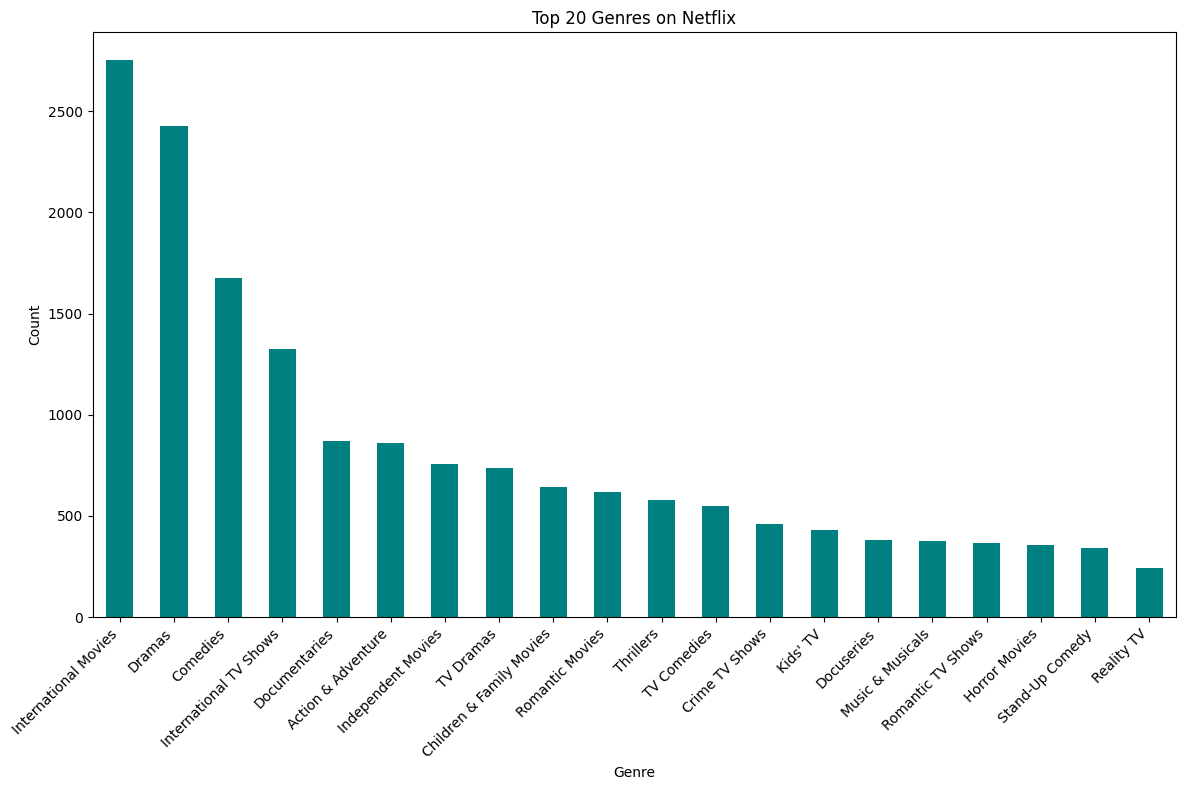

In [ ]:
import matplotlib.pyplot as plt

# 1. Define a function to split genres
def split_genres(genre_string):
    if isinstance(genre_string, str):
        return [genre.strip() for genre in genre_string.split(',')]
    return []

# 2. Apply the function to create a new column with lists of genres
df['genres_list'] = df['listed_in'].apply(split_genres)

# 3. Explode the list of genres into separate rows
genres_df = df.explode('genres_list')

# 4. Calculate the frequency of each genre
genre_counts = genres_df['genres_list'].value_counts()

# 5. Select the top 20 genres
top_genres = genre_counts.head(20)

# 6. Create a bar plot to visualize the frequency of the top genres
plt.figure(figsize=(12, 8))
top_genres.plot(kind='bar', color='teal')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains significantly more Movies than TV Shows.
*   "TV-MA" and "TV-14" are the most frequent ratings for content on Netflix.
*   The years with the highest volume of content releases appear to be in the more recent past, indicating a significant increase in content production or acquisition by Netflix in recent years.
*   After cleaning and splitting the genre strings, the top genres on Netflix are predominantly Drama, Comedy, and Action & Adventure.

### Insights or Next Steps

*   Netflix's content strategy appears to heavily favor Movies and targets mature or young adult audiences based on the prevalence of "TV-MA" and "TV-14" ratings.
*   Further analysis could investigate the trend of content release years to identify the exact peak years and potential reasons for the increase in content acquisition or production during those periods.


# Task
Analyze the Netflix dataset ("netflix_titles.csv") to understand content trends. Load and clean the data by handling missing values, dropping duplicates, parsing dates, and fixing inconsistent formats. Perform univariate analysis on content types, ratings, release years, and genres. Conduct bivariate/multivariate analysis to explore trends in titles added over time, content production by country, content type variation by rating, average movie duration over time, and cross-relationships between genre, rating, and country. Use appropriate visualizations for each analysis step.

## Analyze titles added each year

### Subtask:
Group the data by the year the titles were added and count the number of titles added in each year. Then, visualize this trend over time.


**Reasoning**:
Extract the year from the 'date_added' column, group by the extracted year, count the number of titles, and then create a line plot to visualize the trend of titles added over time.



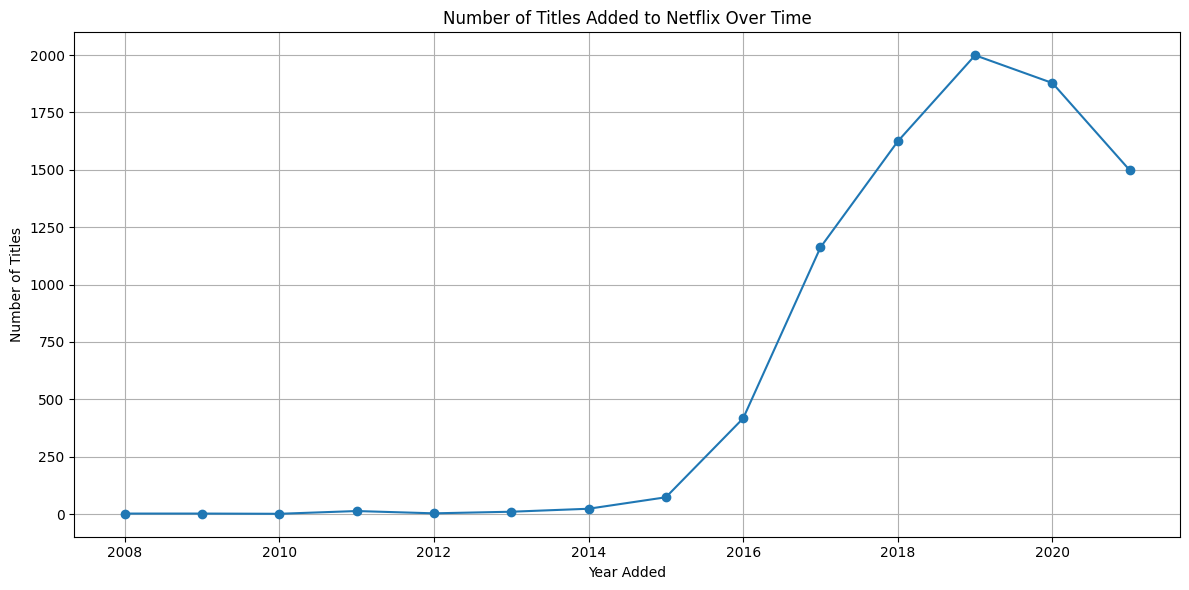

In [ ]:
# 1. Extract the year from the 'date_added' column
df['year_added'] = df['date_added'].dt.year

# 2. Group the DataFrame by 'year_added' and count the number of titles
titles_added_per_year = df['year_added'].value_counts().sort_index()

# 3. Create a line plot
plt.figure(figsize=(12, 6))
titles_added_per_year.plot(kind='line', marker='o')

# 4. Add a title to the plot
plt.title('Number of Titles Added to Netflix Over Time')

# 5. Add labels to the x-axis and y-axis
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Analyze most prolific countries

### Subtask:
Count the number of titles per country and visualize the top countries.


**Reasoning**:
Split the 'country' column, explode the dataframe, count the occurrences of each country, select the top 10, and visualize the results with a bar plot.



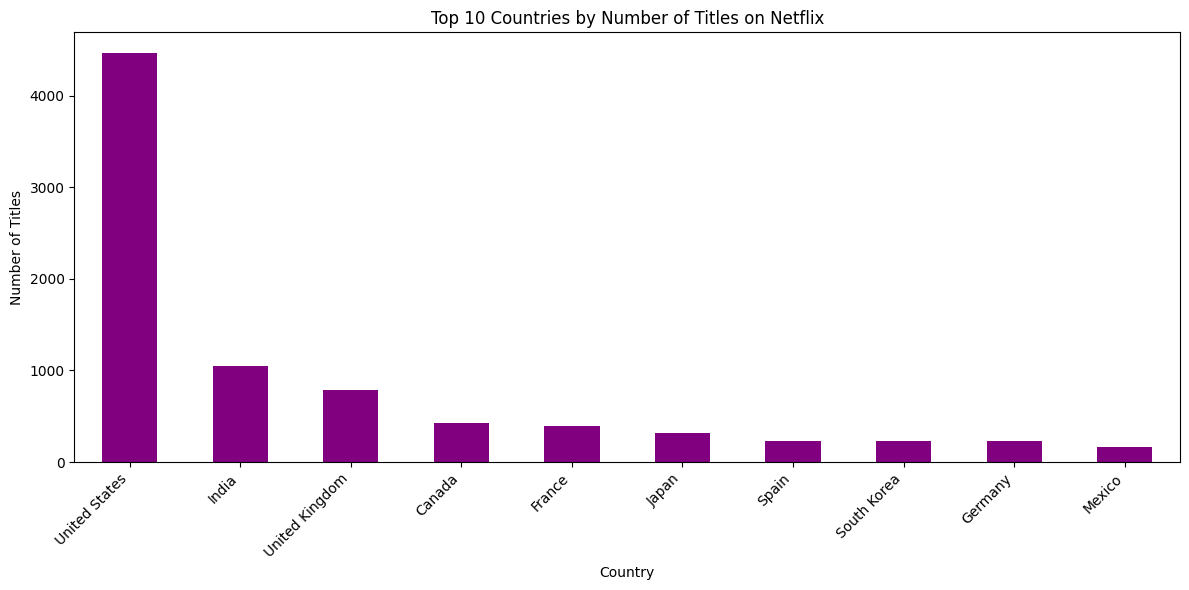

In [ ]:
import matplotlib.pyplot as plt

# 1. Split the 'country' column into a list of countries
def split_countries(country_string):
    if isinstance(country_string, str):
        return [country.strip() for country in country_string.split(',')]
    return []

df['countries_list'] = df['country'].apply(split_countries)

# 2. Explode the DataFrame on the new list of countries column
countries_df = df.explode('countries_list')

# 3. Count the number of titles for each country
country_counts = countries_df['countries_list'].value_counts()

# 4. Select the top 10 countries
top_countries = country_counts.head(10)

# 5. Create a bar plot to visualize the number of titles for the top 10 countries
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze content type by rating

### Subtask:
Group the data by 'rating' and 'type', count occurrences, and visualize using a stacked bar chart or similar.


**Reasoning**:
Group the DataFrame by 'rating' and 'type', count occurrences, unstack the result, and create a stacked bar chart to visualize the content type distribution by rating.



<Figure size 1400x700 with 0 Axes>

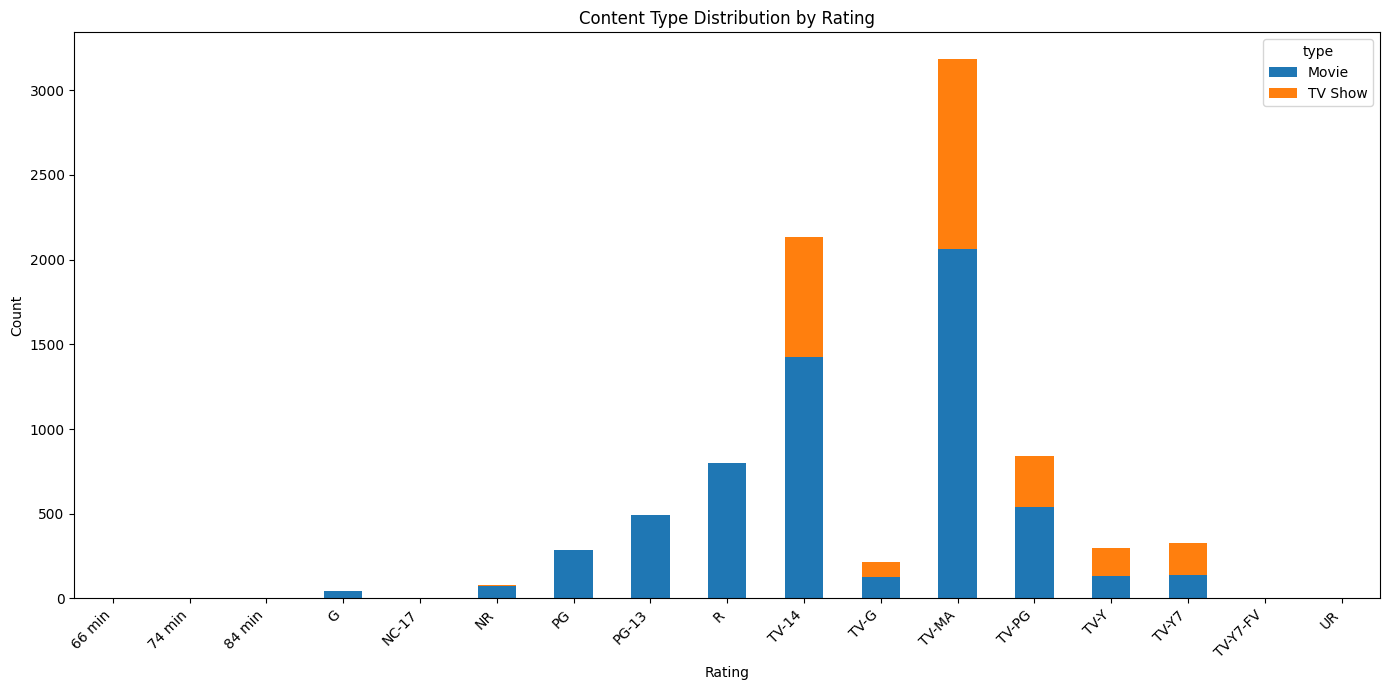

In [ ]:
# Group by 'rating' and 'type' and count occurrences
rating_type_distribution = df.groupby(['rating', 'type']).size().unstack()

# Create a stacked bar plot
plt.figure(figsize=(14, 7))
rating_type_distribution.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Content Type Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze average movie duration over time

### Subtask:
Filter for movies, extract the year from 'date_added', calculate the average duration per year, and visualize using a line plot.


**Reasoning**:
Filter for movies, extract the year from 'date_added', calculate the average duration per year, and visualize using a line plot.



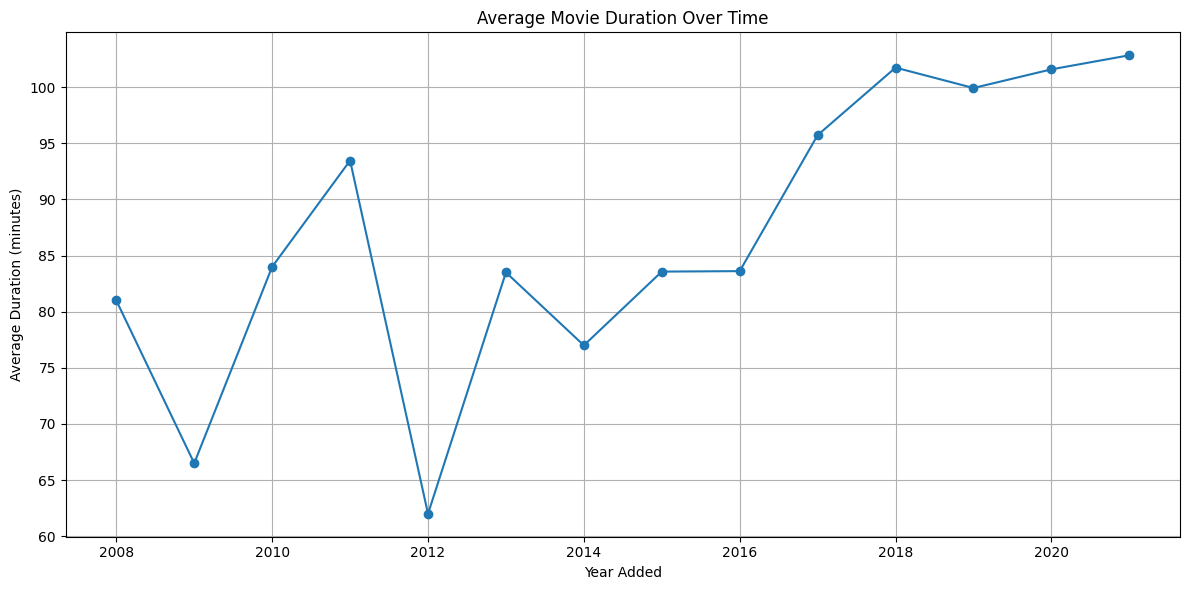

In [ ]:
# Filter for movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract the year from 'date_added'
movies_df['year_added'] = movies_df['date_added'].dt.year

# Calculate the average duration per year
average_duration_per_year = movies_df.groupby('year_added')['duration_cleaned'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
average_duration_per_year.plot(kind='line', marker='o')

# Add title and labels
plt.title('Average Movie Duration Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Duration (minutes)')

# Add grid and display plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Cross-analyze genre, rating, and country

### Subtask:
Explore relationships between genre, rating, and country, potentially using grouping, aggregation, and visualization techniques like heatmaps or grouped bar charts.


**Reasoning**:
Explode the dataframe on the 'countries_list' column to prepare for cross-analysis with genre and rating.



In [ ]:
# 1. Create a new DataFrame genre_country_rating by exploding the df DataFrame on the countries_list column
genre_country_rating = df.explode('countries_list')

**Reasoning**:
Group the exploded dataframe by country, genre, and rating, count the occurrences, and then unstack to create a pivot table for visualization.



In [ ]:
# 2. Group the genre_country_rating DataFrame by 'countries_list', 'genres_list', and 'rating', and count the occurrences
cross_analysis_counts = genre_country_rating.groupby(['countries_list', 'genres_list', 'rating']).size()

# 3. Unstack the cross_analysis_counts DataFrame to create a pivot table
cross_analysis_pivot = cross_analysis_counts.unstack(fill_value=0)

# 4. Fill any resulting NaN values with 0 (already done by unstack fill_value)

# 5. Select a subset of the data to visualize (e.g., top N countries and top M genres)
# First, find the top countries and genres based on overall counts
top_countries_list = genre_country_rating['countries_list'].value_counts().head(10).index.tolist()
top_genres_list = genre_country_rating['genres_list'].value_counts().head(10).index.tolist()

# Filter the pivot table to include only top countries and genres
cross_analysis_subset = cross_analysis_pivot.loc[(top_countries_list, top_genres_list), :]

# Sort the subset for better visualization (optional)
cross_analysis_subset = cross_analysis_subset.sort_index()

**Reasoning**:
The error indicates that the 'genres_list' column still contains lists after the explosion, which cannot be used for grouping. I need to explode the dataframe on 'genres_list' as well before grouping.



In [ ]:
# 1. Create a new DataFrame genre_country_rating by exploding the df DataFrame on the countries_list column
genre_country_rating = df.explode('countries_list')

# Explode on genres_list as well
genre_country_rating = genre_country_rating.explode('genres_list')


# 2. Group the genre_country_rating DataFrame by 'countries_list', 'genres_list', and 'rating', and count the occurrences
cross_analysis_counts = genre_country_rating.groupby(['countries_list', 'genres_list', 'rating']).size()

# 3. Unstack the cross_analysis_counts DataFrame to create a pivot table
cross_analysis_pivot = cross_analysis_counts.unstack(fill_value=0)

# 4. Fill any resulting NaN values with 0 (already done by unstack fill_value)

# 5. Select a subset of the data to visualize (e.g., top N countries and top M genres)
# First, find the top countries and genres based on overall counts
top_countries_list = genre_country_rating['countries_list'].value_counts().head(10).index.tolist()
top_genres_list = genre_country_rating['genres_list'].value_counts().head(10).index.tolist()

# Filter the pivot table to include only top countries and genres
cross_analysis_subset = cross_analysis_pivot.loc[(top_countries_list, top_genres_list), :]

# Sort the subset for better visualization (optional)
cross_analysis_subset = cross_analysis_subset.sort_index()

**Reasoning**:
Create a heatmap to visualize the relationships between the top countries, genres, and ratings, and add appropriate labels and title.



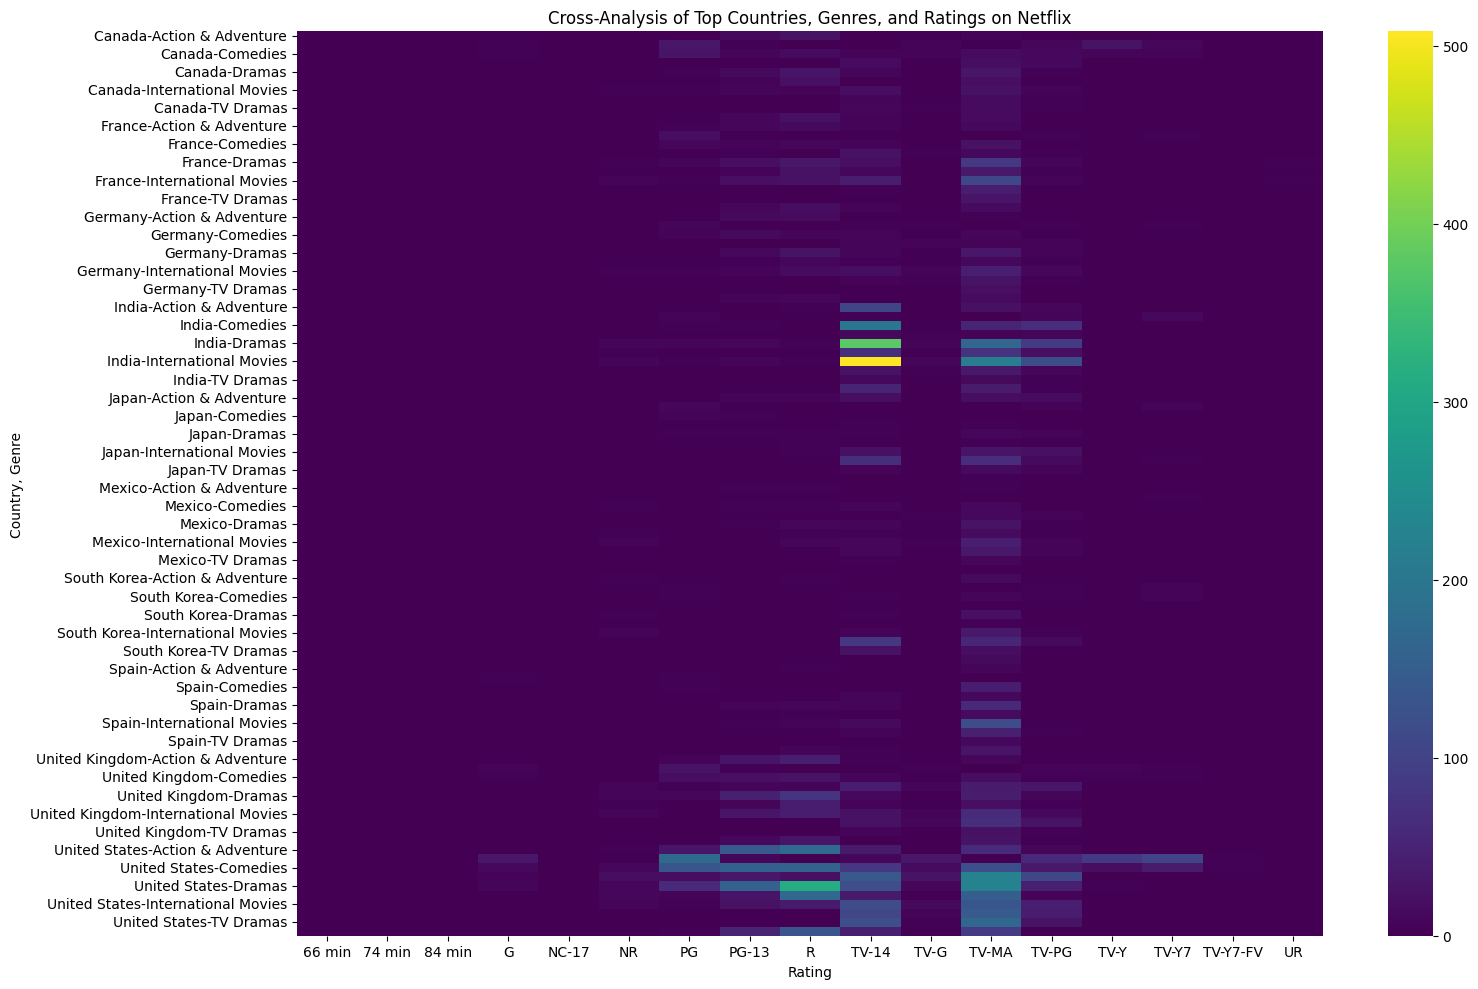

In [ ]:
import seaborn as sns

# 6. Create a heatmap to visualize the relationships
plt.figure(figsize=(16, 10))
sns.heatmap(cross_analysis_subset, annot=False, cmap='viridis')

# 7. Add appropriate titles and labels
plt.title('Cross-Analysis of Top Countries, Genres, and Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Country, Genre')

# 8. Display the plot
plt.tight_layout()
plt.show()

# Task
Analyze time-based trends in the Netflix dataset, including titles added per year, monthly/seasonal trends, and content growth over time.

## Analyze titles added each year

### Subtask:
Extract the year from 'date_added', group by year, count titles, and visualize using a line plot.


**Reasoning**:
Extract the year from 'date_added', group by year, count titles, and visualize using a line plot.



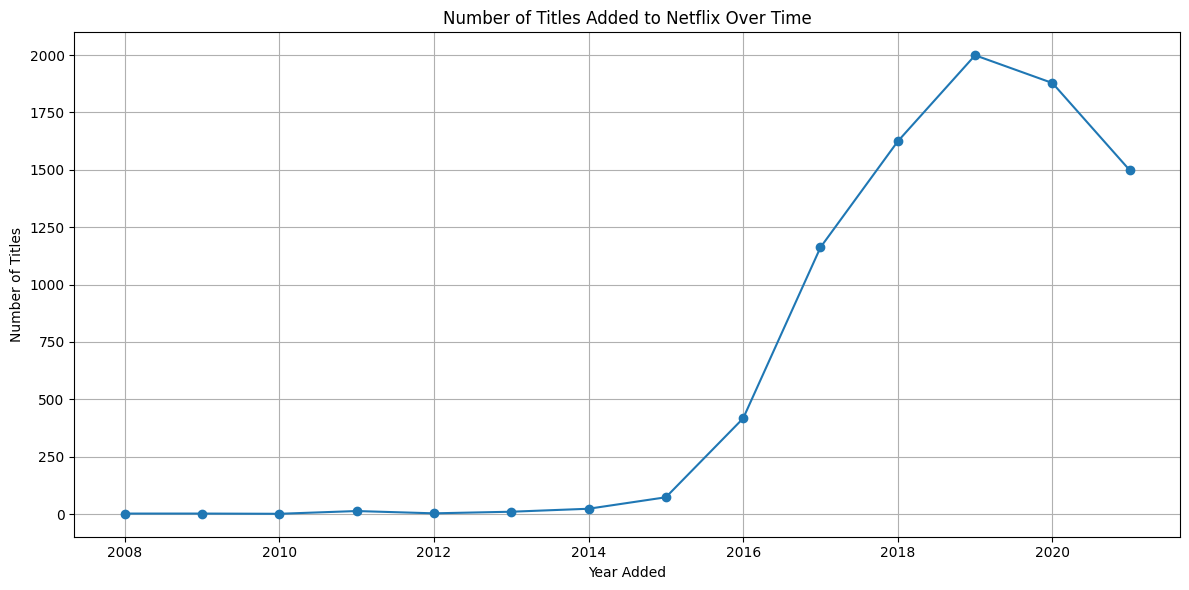

In [ ]:
# 1. Extract the year from the 'date_added' column
df['year_added'] = df['date_added'].dt.year

# 2. Group the DataFrame by 'year_added' and count the number of titles
titles_added_per_year = df['year_added'].value_counts().sort_index()

# 3. Sort the results by year (already done by sort_index())

# 4. Create a line plot
plt.figure(figsize=(12, 6))
titles_added_per_year.plot(kind='line', marker='o')

# 5. Add a title to the plot
plt.title('Number of Titles Added to Netflix Over Time')

# 6. Add labels to the x-axis and y-axis
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Analyze titles added each month

### Subtask:
Extract the month and year from 'date_added', group by month and year, count titles, and visualize using a line plot to identify monthly or seasonal trends.


**Reasoning**:
Extract the month and year from 'date_added', group by month and year, count titles, sort the results, and visualize the trend using a line plot.



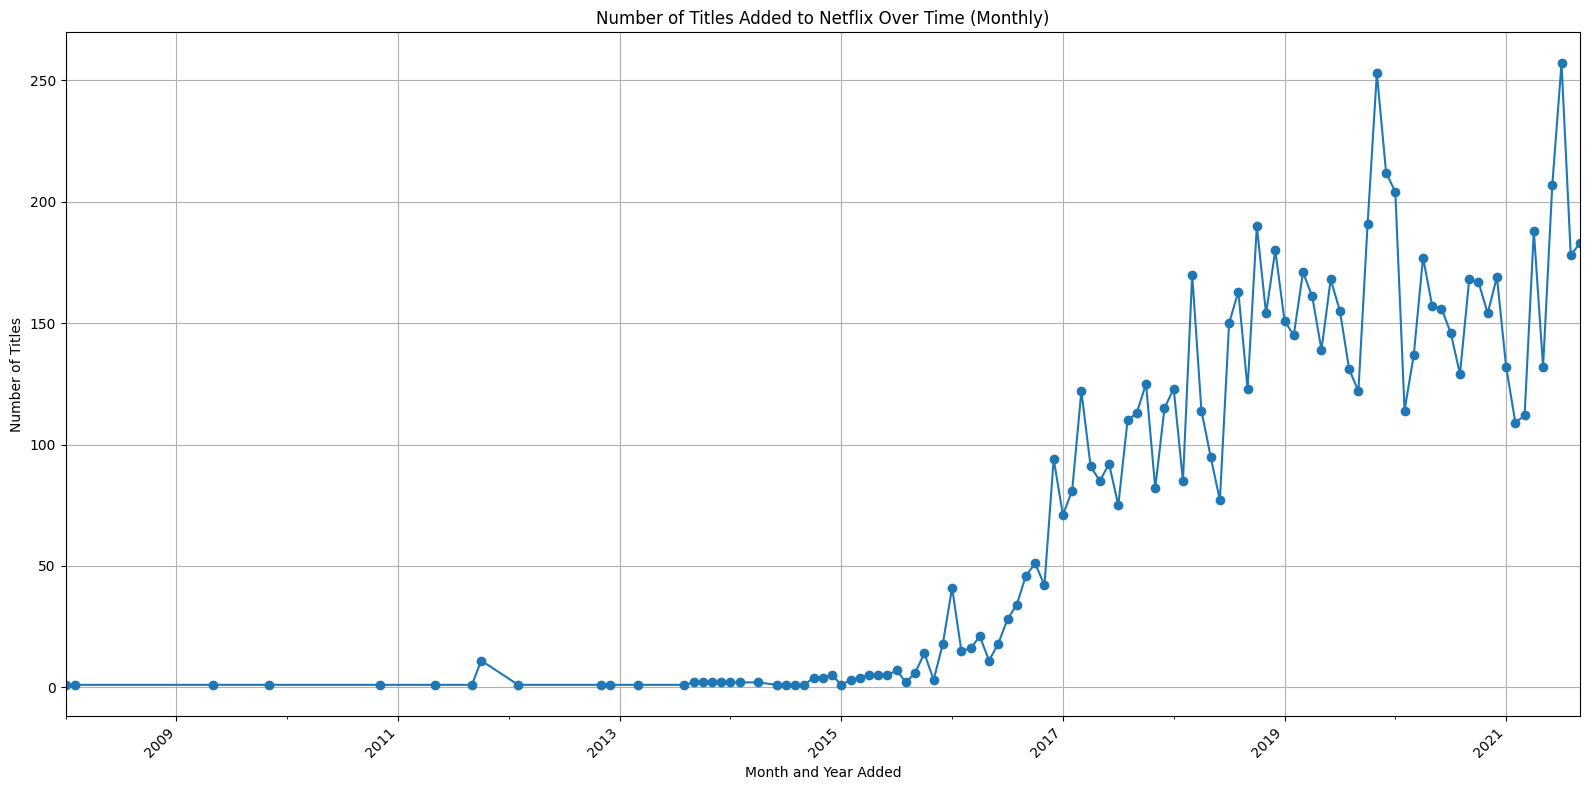

In [ ]:
# 1. Extract the month and year from the 'date_added' column
df['month_year_added'] = df['date_added'].dt.to_period('M')

# 2. Group the DataFrame by the new 'month_year_added' column and count the number of titles
titles_added_per_month_year = df.groupby('month_year_added').size()

# 3. Sort the results by date (already sorted by grouping on Period objects)
titles_added_per_month_year = titles_added_per_month_year.sort_index()

# 4. Create a line plot
plt.figure(figsize=(16, 8))
titles_added_per_month_year.plot(kind='line', marker='o')

# 5. Add a title to the plot
plt.title('Number of Titles Added to Netflix Over Time (Monthly)')

# 6. Add labels to the x-axis and y-axis
plt.xlabel('Month and Year Added')
plt.ylabel('Number of Titles')

# Display the plot
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Analyze content growth over time

### Subtask:
Calculate the cumulative number of titles added over time and visualize the growth using a line plot.


**Reasoning**:
Calculate the cumulative sum of titles added per month and visualize the growth using a line plot.



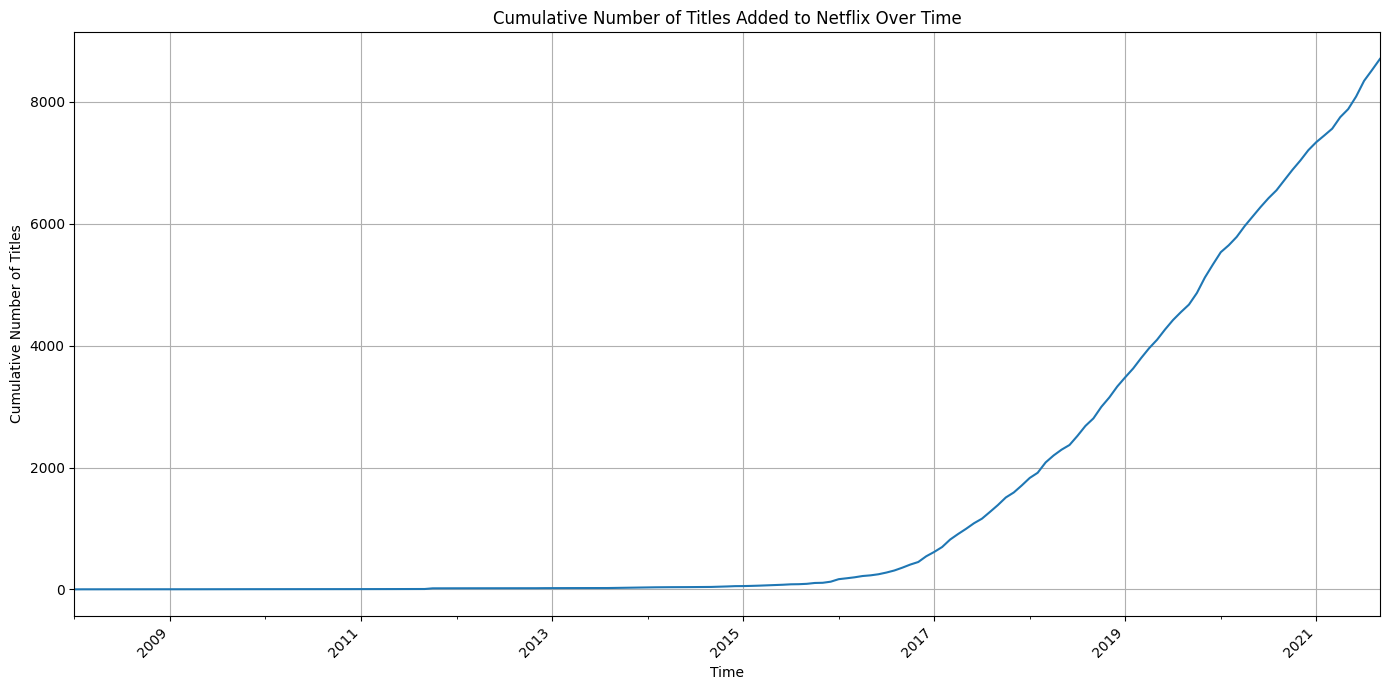

In [ ]:
import matplotlib.pyplot as plt

# Calculate the cumulative sum of titles added per month/year
cumulative_titles = titles_added_per_month_year.cumsum()

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the cumulative titles
cumulative_titles.plot(kind='line', ax=ax)

# Add title and labels
ax.set_title('Cumulative Number of Titles Added to Netflix Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Cumulative Number of Titles')

# Add grid
ax.grid(True)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The number of titles added to Netflix showed a significant increase over the years included in the dataset, particularly in the later years.
*   Analyzing titles added monthly revealed fluctuations, suggesting potential monthly or seasonal patterns in content additions.
*   The cumulative number of titles added to Netflix demonstrates a clear and continuous growth trajectory over time.

### Insights or Next Steps

*   Investigate the specific months or seasons with higher content additions to understand potential release strategies or seasonal content focuses.
*   Analyze the types of content (movies vs. TV shows) contributing to the growth to understand shifts in Netflix's content strategy over time.
